
#**Infinity Research Analysis**

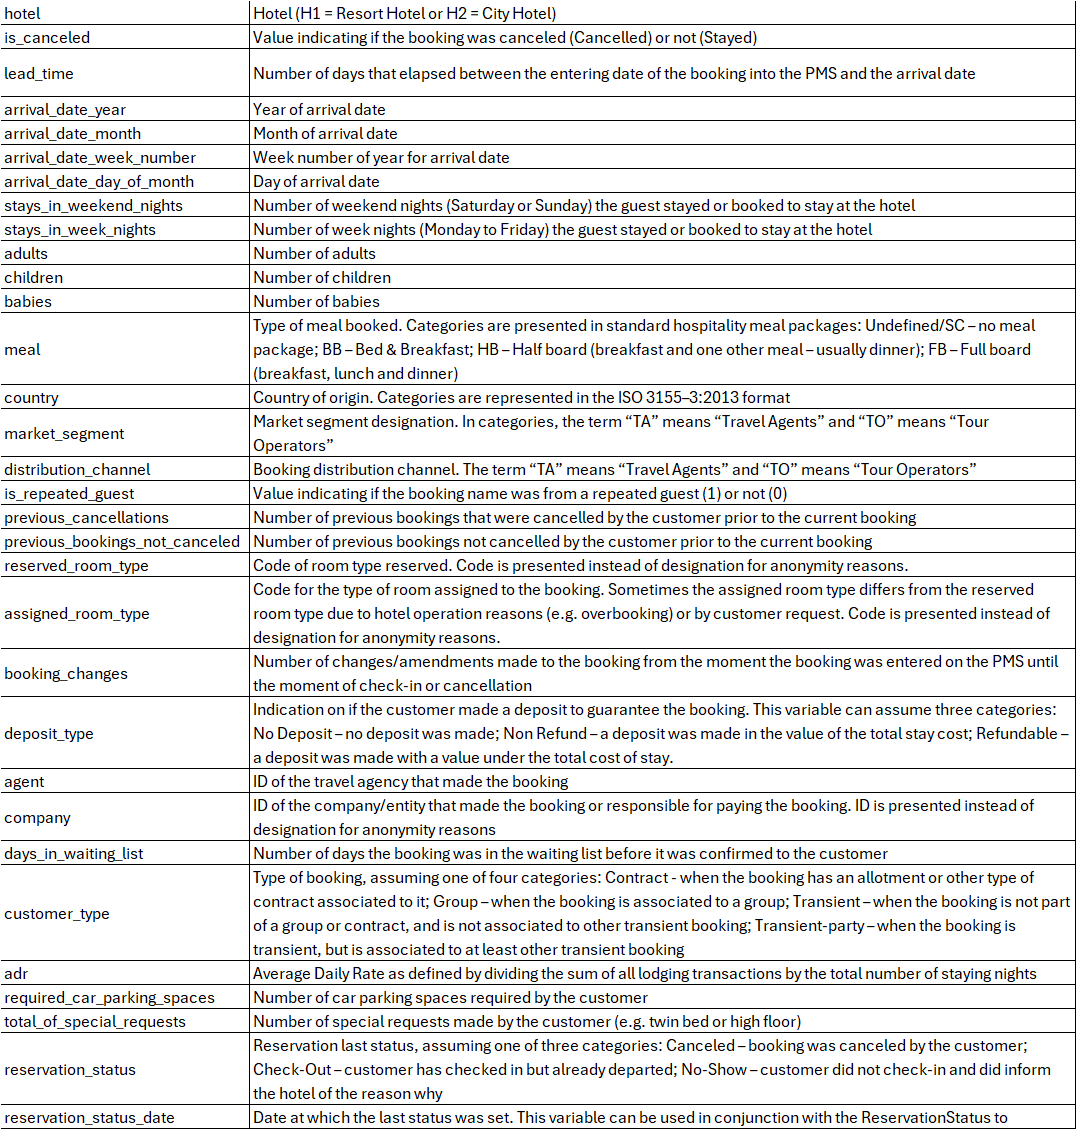

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Booking_Dataset.xlsx")

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,Cancelled,342,2021,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,Cancelled,737,2021,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,Cancelled,7,2021,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,Cancelled,13,2021,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,Cancelled,14,2021,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  object        
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [ ]:
df.describe()
# count: The number of non-missing values in the column.
# mean: The average value of the column.
# std: The standard deviation, which measures the dispersion or spread of the values.
# min: The minimum value in the column.
# 25%: The 25th percentile (also known as the first quartile), where 25% of the data is below this value.
# 50%: The 50th percentile (also known as the median), where 50% of the data is below this value.
# 75%: The 75th percentile (also known as the third quartile), where 75% of the data is below this value.
# max: The maximum value in the column.

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,104.011416,2022.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,2021.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,18.000000,2022.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,69.000000,2022.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,160.000000,2023.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,737.000000,2023.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


### **Customer Segmentation Analysis**

In [ ]:
# Booking Behavior features
booking_behavior_features = [
    'lead_time',
    'is_canceled',
    'is_repeated_guest',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adr',
    'required_car_parking_spaces',
    'total_of_special_requests'
]

# Demographics features
demographics_features = [
    'adults',
    'children',
    'babies',
]


selected_features = booking_behavior_features + demographics_features

In [ ]:
cust_df = df[(selected_features)]

In [ ]:
cust_df.head()

,lead_time,is_canceled,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,stays_in_weekend_nights,stays_in_week_nights,adr,required_car_parking_spaces,total_of_special_requests,adults,children,babies
0,342,Cancelled,0,0,0,0,0,0.0,0,0,2,0.0,0
1,737,Cancelled,0,0,0,0,0,0.0,0,0,2,0.0,0
2,7,Cancelled,0,0,0,0,1,75.0,0,0,1,0.0,0
3,13,Cancelled,0,0,0,0,1,75.0,0,0,1,0.0,0
4,14,Cancelled,0,0,0,0,2,98.0,0,1,2,0.0,0


In [ ]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       119390 non-null  int64  
 1   is_canceled                     119390 non-null  object 
 2   is_repeated_guest               119390 non-null  int64  
 3   previous_cancellations          119390 non-null  int64  
 4   previous_bookings_not_canceled  119390 non-null  int64  
 5   stays_in_weekend_nights         119390 non-null  int64  
 6   stays_in_week_nights            119390 non-null  int64  
 7   adr                             119390 non-null  float64
 8   required_car_parking_spaces     119390 non-null  int64  
 9   total_of_special_requests       119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [ ]:
label_encoders = {}
categorical_features = ['is_canceled']

In [ ]:
label_encoder = LabelEncoder()
cust_df['is_canceled'] = label_encoder.fit_transform(cust_df['is_canceled'])

<ipython-input-12-37cede12c8a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df['is_canceled'] = label_encoder.fit_transform(cust_df['is_canceled'])


In [ ]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   is_repeated_guest               119390 non-null  int64  
 3   previous_cancellations          119390 non-null  int64  
 4   previous_bookings_not_canceled  119390 non-null  int64  
 5   stays_in_weekend_nights         119390 non-null  int64  
 6   stays_in_week_nights            119390 non-null  int64  
 7   adr                             119390 non-null  float64
 8   required_car_parking_spaces     119390 non-null  int64  
 9   total_of_special_requests       119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [ ]:
cust_df.head()

,lead_time,is_canceled,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,stays_in_weekend_nights,stays_in_week_nights,adr,required_car_parking_spaces,total_of_special_requests,adults,children,babies
0,342,0,0,0,0,0,0,0.0,0,0,2,0.0,0
1,737,0,0,0,0,0,0,0.0,0,0,2,0.0,0
2,7,0,0,0,0,0,1,75.0,0,0,1,0.0,0
3,13,0,0,0,0,0,1,75.0,0,0,1,0.0,0
4,14,0,0,0,0,0,2,98.0,0,1,2,0.0,0


In [ ]:
cust_df.isnull().sum()

,0
lead_time,0
is_canceled,0
is_repeated_guest,0
previous_cancellations,0
previous_bookings_not_canceled,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adr,0
required_car_parking_spaces,0
total_of_special_requests,0


In [ ]:
cust_df.fillna(0, inplace=True)

<ipython-input-16-46bd0c666490>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df.fillna(0, inplace=True)


In [ ]:
cust_df.isnull().sum()

,0
lead_time,0
is_canceled,0
is_repeated_guest,0
previous_cancellations,0
previous_bookings_not_canceled,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adr,0
required_car_parking_spaces,0
total_of_special_requests,0


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cust_df)

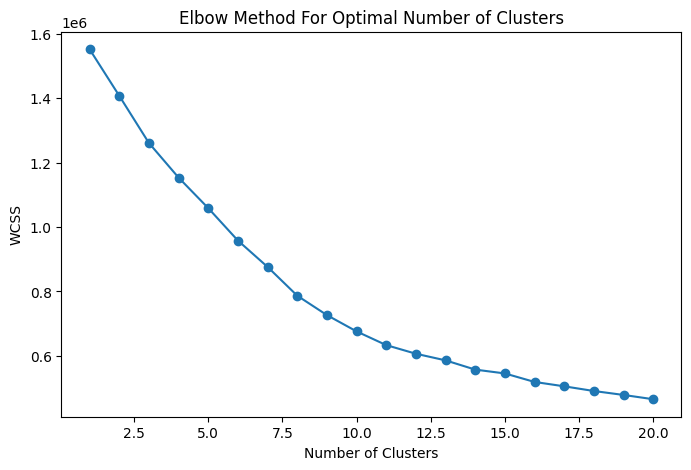

In [ ]:
# Elbow Method - to find the opitmal clusters ( with scaling)
wcss = []
for i in range(1, 21):  # Testing for 1 to 21 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), wcss, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# So from above Elbow method we can say that we are forming elbow at 8
optimal_clusters = 9

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(cust_df)

cust_df['cluster'] = clusters

<ipython-input-20-064450aec622>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df['cluster'] = clusters


In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np

score = silhouette_score(cust_df, clusters)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.3755056738468487


In [ ]:
table = pd.DataFrame(cust_df[['cluster'] + selected_features])

In [ ]:
table

,cluster,lead_time,is_canceled,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,stays_in_weekend_nights,stays_in_week_nights,adr,required_car_parking_spaces,total_of_special_requests,adults,children,babies
0,7,342,0,0,0,0,0,0,0.00,0,0,2,0.0,0
1,2,737,0,0,0,0,0,0,0.00,0,0,2,0.0,0
2,0,7,0,0,0,0,0,1,75.00,0,0,1,0.0,0
3,0,13,0,0,0,0,0,1,75.00,0,0,1,0.0,0
4,6,14,0,0,0,0,0,2,98.00,0,1,2,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,6,23,0,0,0,0,2,5,96.14,0,0,2,0.0,0
119386,5,102,0,0,0,0,2,5,225.43,0,2,3,0.0,0
119387,6,34,0,0,0,0,2,5,157.71,0,4,2,0.0,0
119388,4,109,0,0,0,0,2,5,104.40,0,0,2,0.0,0


In [ ]:
# table_sorted = table.sort_values(by='cluster')
# table_sorted

In [ ]:
cluster_summary = table.groupby('cluster').mean()
print(cluster_summary)

          lead_time  is_canceled  is_repeated_guest  previous_cancellations  \
cluster                                                                       
0         17.533333     0.186945           0.100696                0.059711   
1        187.940034     0.452884           0.004252                0.147852   
2        441.461836     0.676006           0.000000                0.068921   
3        142.593638     0.483817           0.004018                0.005469   
4         94.697569     0.409508           0.006446                0.043646   
5         35.066031     0.323148           0.012222                0.004024   
6         25.258601     0.294182           0.019075                0.019554   
7        293.882031     0.637153           0.019097                0.406510   
8         35.000000     1.000000           0.000000                0.000000   

         previous_bookings_not_canceled  stays_in_weekend_nights  \
cluster                                                       

In [ ]:
cluster_summary = table.groupby('cluster').median()
print(cluster_summary)

         lead_time  is_canceled  is_repeated_guest  previous_cancellations  \
cluster                                                                      
0             11.0          0.0                0.0                     0.0   
1            186.0          0.0                0.0                     0.0   
2            423.0          1.0                0.0                     0.0   
3            141.0          0.0                0.0                     0.0   
4             93.0          0.0                0.0                     0.0   
5             29.0          0.0                0.0                     0.0   
6             21.0          0.0                0.0                     0.0   
7            289.0          1.0                0.0                     0.0   
8             35.0          1.0                0.0                     0.0   

         previous_bookings_not_canceled  stays_in_weekend_nights  \
cluster                                                            
0    

In [ ]:
import pandas as pd

data = {
    'Cluster': [0, 1, 2, 3, 4, 5, 6, 7, 8],
    'Name': [
        'Budget Solo Travelers',
        'Early Planners Couples',
        'Long-Stay Corporate Guests',
        'Premium Family Vacationers',
        'Standard Couples',
        'High-Spending Families',
        'Short-Notice Couples',
        'Late Booking Business Travelers',
        'Luxury Solo Travelers'
    ],
    'Type': [
        'Solo',
        'Couple',
        'Solo',
        'Family',
        'Couple',
        'Family',
        'Couple',
        'Solo',
        'Solo'
    ],
    'Business Suggestion': [
        'Offer last-minute deals and discounts on single rooms.',
        'Provide early booking discounts and romantic packages for couples.',
        'Promote long-stay offers and corporate rates, with flexible cancellation policies.',
        'Offer family packages with child-friendly amenities and activities.',
        'Provide standard packages with optional add-ons for special occasions.',
        'Create luxury family packages with exclusive amenities and services.',
        'Promote weekend getaways and special event packages.',
        'Offer flexible booking options and business traveler amenities.',
        'Market exclusive experiences and VIP services.'
    ]
}

dataframe = pd.DataFrame(data)
pd.set_option('display.max_colwidth', None)
dataframe


,Cluster,Name,Type,Business Suggestion
0,0,Budget Solo Travelers,Solo,Offer last-minute deals and discounts on single rooms.
1,1,Early Planners Couples,Couple,Provide early booking discounts and romantic packages for couples.
2,2,Long-Stay Corporate Guests,Solo,"Promote long-stay offers and corporate rates, with flexible cancellation policies."
3,3,Premium Family Vacationers,Family,Offer family packages with child-friendly amenities and activities.
4,4,Standard Couples,Couple,Provide standard packages with optional add-ons for special occasions.
5,5,High-Spending Families,Family,Create luxury family packages with exclusive amenities and services.
6,6,Short-Notice Couples,Couple,Promote weekend getaways and special event packages.
7,7,Late Booking Business Travelers,Solo,Offer flexible booking options and business traveler amenities.
8,8,Luxury Solo Travelers,Solo,Market exclusive experiences and VIP services.


###**Pricing Driver Identification** : Room Price

In [ ]:
pricing_df = df.copy()

In [ ]:
pricing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  object        
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [ ]:
pricing_df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
pricing_df = pricing_df.drop(['agent','company'],axis=1)

In [ ]:
pricing_df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
pricing_df.fillna(0, inplace=True)

In [ ]:
pricing_df.corr(numeric_only=True)[['adr']].abs().sort_values(by ='adr',ascending=False)

,adr
adr,1.000000
children,0.324853
adults,0.230641
arrival_date_year,0.197580
total_of_special_requests,0.172185
is_repeated_guest,0.134314
arrival_date_week_number,0.075791
previous_bookings_not_canceled,0.072144
previous_cancellations,0.065646
stays_in_week_nights,0.065237


In [ ]:
# df_encoded = pd.get_dummies(pricing_df, columns=['hotel','is_canceled','arrival_date_month','meal','country','market_segment','distribution_channel',
#                         'reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status'], drop_first=True)
# correlation_matrix = df_encoded.corr(numeric_only=True)[['adr']].abs().sort_values(by = 'adr',ascending=False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
features = [
    "lead_time", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children",
    "babies", "market_segment","reserved_room_type", "required_car_parking_spaces", "total_of_special_requests"
]
target = 'adr'

In [ ]:
# label_encoders = {}
# categorical_features = ['is_canceled','market_segment','customer_type']

In [ ]:
# label_encoder = LabelEncoder()
# pricing_df['is_canceled'] = label_encoder.fit_transform(pricing_df['is_canceled'])
# pricing_df['market_segment'] = label_encoder.fit_transform(pricing_df['market_segment'])
# pricing_df['customer_type'] = label_encoder.fit_transform(pricing_df['customer_type'])

In [ ]:
X = pricing_df[features]
y = pricing_df[target]

In [ ]:
X_encoded = pd.get_dummies(X)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)
print('Random Forest Regression MAE:', mean_absolute_error(y_test, y_pred))
print('Random Forest Regression MSE:', mean_squared_error(y_test, y_pred))
print('Random Forest Regression R2:', r2_score(y_test, y_pred))

Random Forest Regression MAE: 22.716580572340174
Random Forest Regression MSE: 1272.8092745910246
Random Forest Regression R2: 0.443455059930547


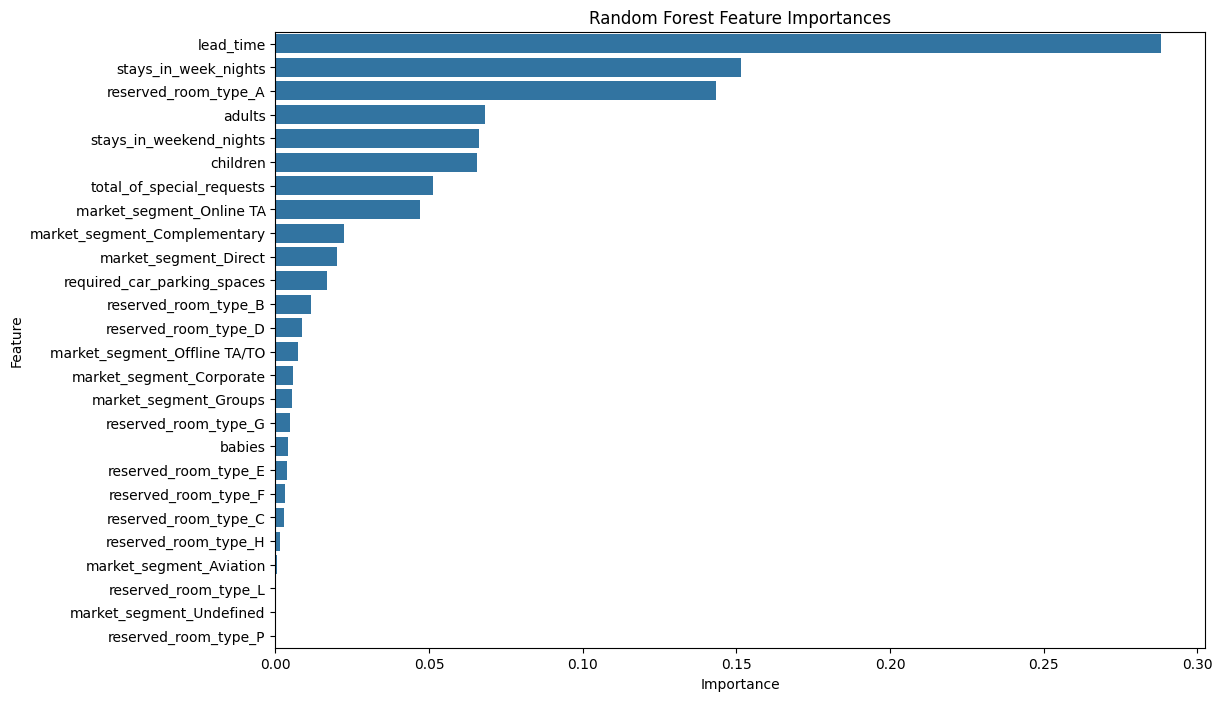

In [ ]:
# important feature
importances = rf_model.feature_importances_


feature_names = X_train.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Random Forest Feature Importances')
plt.show()

Gradient Boosting Regression MAE: 27.958067260401194
Gradient Boosting Regression MSE: 1401.7892525269074
Gradient Boosting Regression R2: 0.3870576439755522


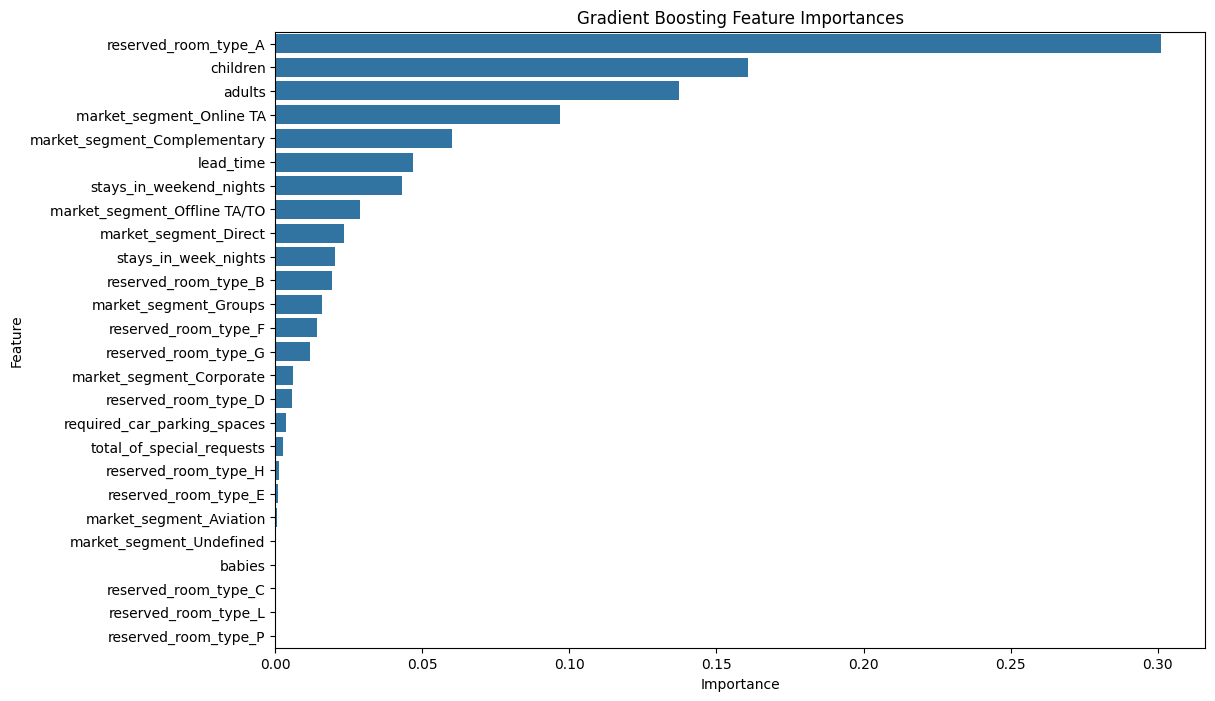

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)


gb_model.fit(X_train, y_train)


y_pred = gb_model.predict(X_test)
print('Gradient Boosting Regression MAE:', mean_absolute_error(y_test, y_pred))
print('Gradient Boosting Regression MSE:', mean_squared_error(y_test, y_pred))
print('Gradient Boosting Regression R2:', r2_score(y_test, y_pred))

# Feature importance
importances = gb_model.feature_importances_


feature_names = X_train.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Gradient Boosting Feature Importances')
plt.show()


In [ ]:
# The Random Forest Regression performed better than the Gradient Boosting Regression in this case, based on lower MAE and MSE values and a higher R² value.

## **Pricing Strategy Development**

In [ ]:
dynamic_df = df.copy()

In [ ]:
dynamic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  object        
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

In [ ]:
dynamic_df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
dynamic_df = dynamic_df.drop(['agent','company'],axis=1)

In [ ]:
dynamic_df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
dynamic_df.fillna(0, inplace=True)

In [ ]:
# Aggregate demand data by month and year
demand_data = df.groupby(['reservation_status_date'])['adr'].mean().reset_index()

In [ ]:
# Prepare data for Prophet
demand_data.columns = ['ds', 'y']  # Prophet expects columns 'ds' for date and 'y' for the value

In [ ]:
from prophet import Prophet
# Initialize and fit the Prophet model
model = Prophet()
model.fit(demand_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp58b52dx5/byfbtcme.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp58b52dx5/crq8c6l0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25889', 'data', 'file=/tmp/tmp58b52dx5/byfbtcme.json', 'init=/tmp/tmp58b52dx5/crq8c6l0.json', 'output', 'file=/tmp/tmp58b52dx5/prophet_modelmz7k2xc_/prophet_model-20240805083455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:34:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:34:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=24, freq='M')  # Forecasting for 24 months into the future

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 1200x600 with 0 Axes>

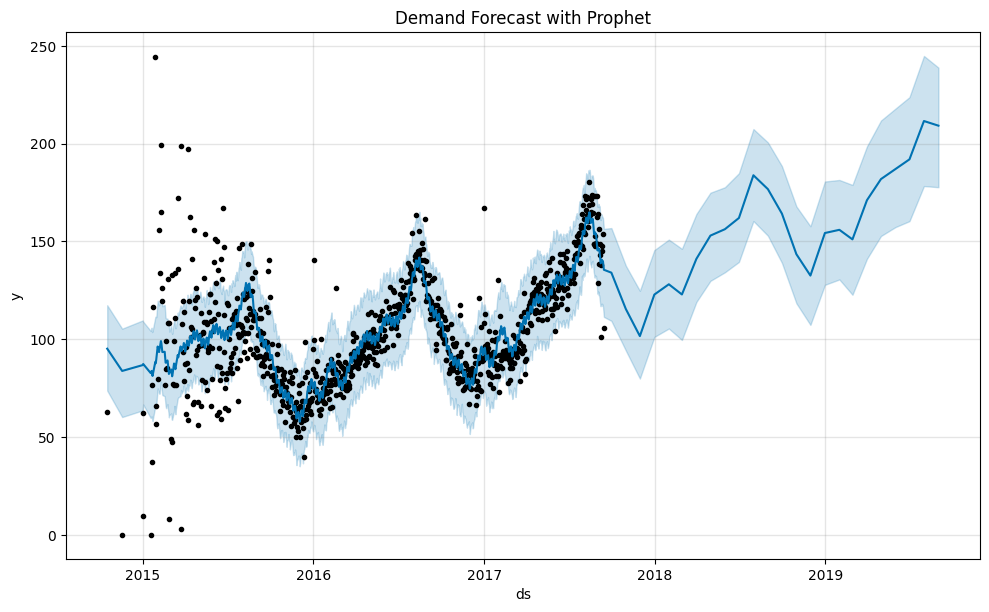

In [ ]:
forecast = model.predict(future)

# Plotting
plt.figure(figsize=(12, 6))
model.plot(forecast)
plt.title('Demand Forecast with Prophet')
plt.show()

In [ ]:
pricing_strategies = {
    'Budget Solo Travelers': lambda base_price: base_price * 0.8,
    'Early Planners Couples': lambda base_price: base_price * 0.9,
    'Long-Stay Corporate Guests': lambda base_price: base_price * 0.85,
    'Premium Family Vacationers': lambda base_price: base_price * 1.2,
    'Standard Couples': lambda base_price: base_price * 1.0,
    'High-Spending Families': lambda base_price: base_price * 1.3,
    'Short-Notice Couples': lambda base_price: base_price * 1.1,
    'Late Booking Business Travelers': lambda base_price: base_price * 1.05,
    'Luxury Solo Travelers': lambda base_price: base_price * 1.4,
}

In [ ]:
def apply_pricing_strategy(segment, base_price):
    return pricing_strategies.get(segment, lambda x: x)(base_price)


In [ ]:
base_price = 100
segment = 'Premium Family Vacationers'
adjusted_price = apply_pricing_strategy(segment, base_price)
print(f"Adjusted price for {segment}: ${adjusted_price:.2f}")

Adjusted price for Premium Family Vacationers: $120.00


## **Impact Quantification**

In [ ]:
base_price = 100

In [ ]:
pricing_strategies = {
    'Budget Solo Travelers': lambda base_price: base_price * 0.8,
    'Early Planners Couples': lambda base_price: base_price * 0.9,
    'Long-Stay Corporate Guests': lambda base_price: base_price * 0.85,
    'Premium Family Vacationers': lambda base_price: base_price * 1.2,
    'Standard Couples': lambda base_price: base_price * 1.0,
    'High-Spending Families': lambda base_price: base_price * 1.3,
    'Short-Notice Couples': lambda base_price: base_price * 1.1,
    'Late Booking Business Travelers': lambda base_price: base_price * 1.05,
    'Luxury Solo Travelers': lambda base_price: base_price * 1.4,
}


In [ ]:
bookings_per_segment = {
    'Budget Solo Travelers': 500,
    'Early Planners Couples': 300,
    'Long-Stay Corporate Guests': 200,
    'Premium Family Vacationers': 150,
    'Standard Couples': 400,
    'High-Spending Families': 100,
    'Short-Notice Couples': 250,
    'Late Booking Business Travelers': 180,
    'Luxury Solo Travelers': 120,
}

# Example
cost_per_booking = 50

In [ ]:
results = []
for segment, bookings in bookings_per_segment.items():
    price = pricing_strategies[segment](base_price)
    revenue = price * bookings
    cost = cost_per_booking * bookings
    profit = revenue - cost
    results.append({
        'Segment': segment,
        'Price': price,
        'Revenue': revenue,
        'Cost': cost,
        'Profit': profit
    })

In [ ]:
impact_df = pd.DataFrame(results)

impact_df

,Segment,Price,Revenue,Cost,Profit
0,Budget Solo Travelers,80.0,40000.0,25000,15000.0
1,Early Planners Couples,90.0,27000.0,15000,12000.0
2,Long-Stay Corporate Guests,85.0,17000.0,10000,7000.0
3,Premium Family Vacationers,120.0,18000.0,7500,10500.0
4,Standard Couples,100.0,40000.0,20000,20000.0
5,High-Spending Families,130.0,13000.0,5000,8000.0
6,Short-Notice Couples,110.0,27500.0,12500,15000.0
7,Late Booking Business Travelers,105.0,18900.0,9000,9900.0
8,Luxury Solo Travelers,140.0,16800.0,6000,10800.0
